In [3]:
import pandas as pd
from IPython.utils import io
import builtins

# Beobachter-Funktion zuerst definieren
def _on_x_soll_update(new_value: float):

    """Beobachter nur Tabelle ohne Plot"""
    try:
        if 'df_base' in globals() and isinstance(df_base, pd.DataFrame):
            if 'x_soll' in df_base.columns:
                df_base.loc[:, 'x_soll'] = new_value
            if {'x_ist', 'x_soll'}.issubset(df_base.columns):
                df_base.loc[:, 'deviation'] = df_base['x_ist'] - new_value
            
            print(f" x_soll auf {new_value} aktualisiert")

            display(df_base)
            
    except Exception:
        pass

# danach reload_data definieren
def reload_data():
    """Daten aus der ersten Datei neu laden"""
    try:
        with io.capture_output() as _:
            get_ipython().run_line_magic(
                "run",
                "C:/Users/Dell/Desktop/ml_modular_system/input_module/excel_adapter.ipynb",
            )
        
        global df_base, input_ready
        df_base = df_clean[["ODA_x", "x_ist", "x_soll", "deviation"]].copy()
        df_base.index = pd.to_datetime(df_base.index)
        input_ready = True
        
        # Beobachter erneut verbinden (jetzt definiert)
        _subject = getattr(builtins, "x_soll_subject", None)
        if _subject is not None:
            _subject.attach(_on_x_soll_update)
        print(f" erneut verbunden x_soll-Wert: {_subject.value}")
        
        # Daten anzeigen
        display(df_base)
        print(f"{df_base.shape[0]} rows × {df_base.shape[1]} columns")
      
    except Exception as e:
        print(f"❌ Fehler in reload_data: {str(e)}")

# Definition von input_ready
input_ready = False

# Initialer Lauf
reload_data()

CleanData = ["ODA_x", "x_ist", "x_soll", "deviation"]



 erneut verbunden x_soll-Wert: 10.0


,ODA_x,x_ist,x_soll,deviation
datetime,,,,
2022-11-29 12:00:00,4.358199,4.371218,10.0,-5.628782
2022-11-29 12:15:00,4.335261,4.372252,10.0,-5.627748
2022-11-29 12:30:00,4.311610,4.378433,10.0,-5.621567
2022-11-29 12:45:00,4.332396,4.379833,10.0,-5.620167
2022-11-29 13:00:00,4.345254,4.384516,10.0,-5.615484
...,...,...,...,...
2025-07-04 06:30:00,8.631339,7.616642,10.0,-2.383358
2025-07-04 06:45:00,8.727860,7.632800,10.0,-2.367200
2025-07-04 07:00:00,8.796650,7.612166,10.0,-2.387834


90991 rows × 4 columns


ML automatisch aktualisiert | Typ='B' | Anomalien: 1811


,x_ist,x_soll,ODA_x,deviation,abweichung 1,anomaly_iforest
datetime,,,,,,
2022-11-29 12:00:00,4.371218,10.0,4.358199,-5.628782,-5.628782,0
2022-11-29 12:15:00,4.372252,10.0,4.335261,-5.627748,-5.627748,0
2022-11-29 12:30:00,4.378433,10.0,4.311610,-5.621567,-5.621567,0
2022-11-29 12:45:00,4.379833,10.0,4.332396,-5.620167,-5.620167,0
2022-11-29 13:00:00,4.384516,10.0,4.345254,-5.615484,-5.615484,0
...,...,...,...,...,...,...
2025-07-04 06:30:00,7.616642,10.0,8.631339,-2.383358,-2.383358,0
2025-07-04 06:45:00,7.632800,10.0,8.727860,-2.367200,-2.367200,0
2025-07-04 07:00:00,7.612166,10.0,8.796650,-2.387834,-2.387834,0


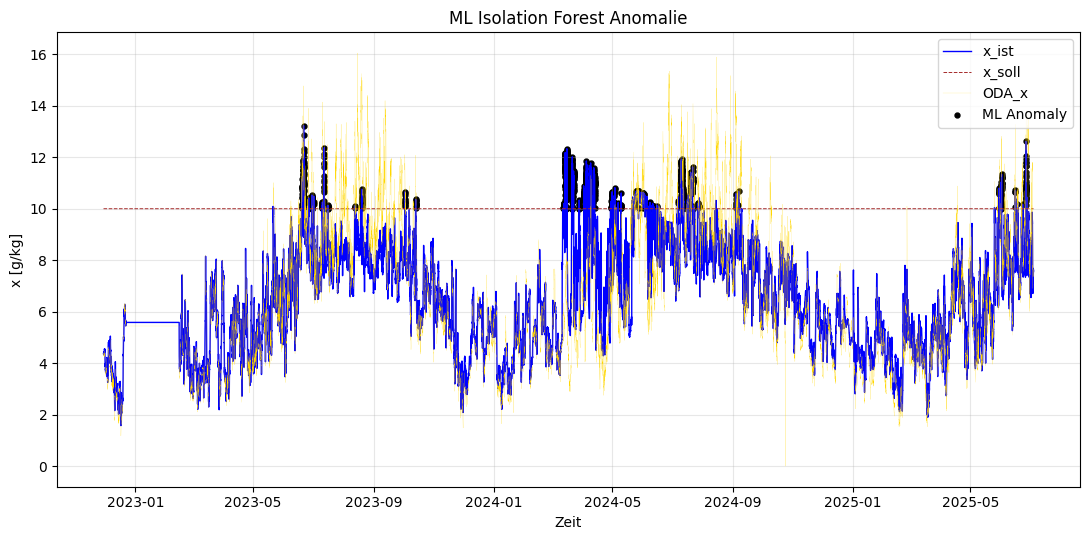

In [5]:
# --- Block 2: Feature-Controller + einfache Anzeige + einzelner Plot ---
import pandas as pd
import numpy as np
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import builtins

if not hasattr(builtins, "mem"):
    builtins.mem = {}


# -- Beobachter: x_soll/deviation bei jeder Änderung von x_soll aktualisieren
def _on_x_soll_update(new_value: float):
    try:
        if 'df_base' in globals() and isinstance(df_base, pd.DataFrame):
            if 'x_soll' in df_base.columns:
                df_base.loc[:, 'x_soll'] = new_value
            if {'x_ist', 'deviation'}.issubset(df_base.columns):
                df_base.loc[:, 'deviation'] = df_base['x_ist'] - new_value
# Features + ML + Anzeige + Plot einmalig aktualisieren
            _run_complete_pipeline()
    except Exception:
        pass

# -- Beobachter für allgemeine Kanäle über dasselbe Subjekt
def _on_event_df_export(df):
    try:
        if isinstance(df, pd.DataFrame):
            global df_base
            df_base = df.loc[:, ["ODA_x", "x_ist", "x_soll", "deviation"]].copy()
            df_base.index = pd.to_datetime(df_base.index)
# Features + ML + Anzeige + Plot einmalig aktualisieren
            _run_complete_pipeline()
    except Exception:
        pass



# -- Beobachter einmalig registrieren (wie im Originalcode)
_subject = getattr(builtins, "x_soll_subject", None)
if _subject is not None:
    if not getattr(builtins, "_x_soll_observer_attached", False):
        try:
            _subject.attach(_on_x_soll_update)
            builtins._x_soll_observer_attached = True
        except Exception:
            pass

    if not getattr(builtins, "_proc_channels_attached", False):
        try:
            _subject.attach_event("df_export", _on_event_df_export)
            
            builtins._proc_channels_attached = True
        except Exception:
            pass

  

    # Initiales Update
    try:
        _on_x_soll_update(_subject.value)
    except Exception:
        pass
REQUIRED_COLS = ["abweichung 1","abweichung 2", "abweichung 3", "Innenfeuchtigkeit über Soll" ]


eps = 1e-9

def apply_rules(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()
    out["abweichung 1"] = out["x_ist"] - out["x_soll"]
    out["abs_abweichung 1"] = out["abweichung 1"].abs()

    out["abweichung 2"] = out["x_ist"] - out["ODA_x"]

    
    out["abweichung 3"] = ((out["ODA_x"] > out["x_soll"]) & (out["x_ist"] > out["x_soll"])).astype("Int8")

    
    out["Innenfeuchtigkeit über Soll"] = ((out["x_ist"] > out["x_soll"]) & (out["ODA_x"] < out["x_soll"])).astype("Int8")

    
    return out


def _plot_single_result():
    """Einzelner Plot  neue Ergebnisse"""
    if 'df_results' not in globals():
        print("df_results fehlt (nicht im Speicher)")
        return
    if df_results is None or df_results.empty:
        print("df_results ist leer oder None")
        return
        
    try:
        plt.figure(figsize=(11,5.5))
        
        if "x_ist" in df_results.columns:
            plt.plot(df_results.index, df_results["x_ist"], label="x_ist", color="blue", linewidth=1)
        if "x_soll" in df_results.columns:
            plt.plot(df_results.index, df_results["x_soll"], label="x_soll", linestyle="--", color="brown", linewidth=0.7)
        if "ODA_x" in df_results.columns:
            plt.plot(df_results.index, df_results["ODA_x"], label="ODA_x", color="Gold", linewidth=0.1)

        anoms = df_results[df_results["anomaly_iforest"] == 1]
        if "x_ist" in df_results.columns and not anoms.empty:
            plt.scatter(anoms.index, anoms["x_ist"], label="ML Anomaly", s=50, color="black", marker='.')

        plt.xlabel("Zeit")
        plt.ylabel("x [g/kg]")
        plt.title("ML Isolation Forest Anomalie")
        plt.legend(loc="upper right")
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f" Fehler beim Plotten: {str(e)}")

input_ready = True


def _run_complete_pipeline():

    


    try:
        # Geändert: Prüfung auf input_ready
        if (not input_ready or df_base is None or not isinstance(df_base, pd.DataFrame) or 
            df_base.empty or not all(col in df_base.columns for col in ['x_ist', 'x_soll', 'ODA_x'])):
            print(" Warte auf Input-Daten...")
            return
            
        global df_new, df_results, labels, scores
        
        # Rest bleibt gleich...
        clear_output(wait=True)
        df_new = apply_rules(df_base)
        
        _subject = getattr(builtins, "x_soll_subject", None)
        if _subject is not None:
            _subject.emit("features_ready", df_new)

        # Fallback, falls kein Listener registriert ist (Verhalten bleibt erhalten)
        if ('df_results' not in globals()) or (df_results is None):
            if hasattr(builtins, '_ml_observer_update'):
                df_results, labels, scores, kind = builtins._ml_observer_update(df_new)
            else:
                df_results, labels, scores, kind = None, None, None, None

        
        if hasattr(builtins, '_ml_observer_update'):
            ml_results = builtins._ml_observer_update(df_new)
            df_results, labels, scores, kind = ml_results
            
            if df_results is not None and labels is not None:
                print(f"ML automatisch aktualisiert | Typ='{kind}' | Anomalien: {int(df_results['anomaly_iforest'].sum())}")

                display(df_results)
                _plot_single_result()
            else:
                display(df_new)
                print(f"{len(df_new)} rows × {len(df_new.columns)} columns")
        else:
            display(df_new)
            print(f"{len(df_new.columns)} columns")
        
    except Exception as e:
        print(f"Pipeline error: {str(e)}")

# nachdem df_results / df_new aktualisiert wurden
try:
# wenn df_results vorhanden ist, sonst df_new verwenden
    _mem_df = df_results if ('df_results' in globals() and isinstance(df_results, pd.DataFrame) and not df_results.empty) else df_new
    if isinstance(_mem_df, pd.DataFrame) and not _mem_df.empty:
        builtins.mem["df_results"] = _mem_df.copy()
 # optional: Zeitpunkt der letzten Aktualisierung markieren

        builtins.mem["df_results_updated_at"] = pd.Timestamp.utcnow()
        print(" mem[df_results] aktualisiert (im Speicher).")
except Exception as _e:
        print(f"Aktualisierung von mem[df_results] fehlgeschlagen: {_e}")


_run_complete_pipeline()






In [ ]:
# =========================================
# Block 3 — ML-Beobachter (Hintergrunddienst – kein Plotten)
# =========================================

from abc import ABC, abstractmethod
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import builtins





class AnomalyStrategy(ABC):
    @abstractmethod
    def fit(self, X: np.ndarray) -> None: ...
    @abstractmethod
    def predict(self, X: np.ndarray) -> np.ndarray: ...
    def scores(self, X: np.ndarray) -> np.ndarray:
        raise NotImplementedError

class IsolationForestStrategy(AnomalyStrategy):
    def __init__(self, n_estimators=400, contamination=0.0199, random_state=5210):
        self.model = IsolationForest(
            n_estimators=n_estimators,
            contamination=contamination,
            random_state=random_state
        )
    def fit(self, X: np.ndarray) -> None:
        self.model.fit(X)
    def predict(self, X: np.ndarray) -> np.ndarray:
        return (self.model.predict(X) == -1).astype(int)
    def scores(self, X: np.ndarray) -> np.ndarray:
        return self.model.decision_function(X)

class MLHandler:
    def __init__(self): self.next = None
    def set_next(self, h): self.next = h; return h
    def can_handle(self, X, ctx): return False
    def run(self, X, ctx=None):
        ctx = ctx or {}
        if self.can_handle(X, ctx): return self._run(X, ctx)
        if self.next: return self.next.run(X, ctx)
        raise RuntimeError("Kein geeigneter Verarbeiter vorhanden.")

    def _run(self, X, ctx): raise NotImplementedError

class IForestHandler(MLHandler):
    def __init__(self, strategy: AnomalyStrategy):
        super().__init__()
        self.strategy = strategy
    def can_handle(self, X, ctx):
        t = str((ctx or {}).get("task","anomaly")).lower()
        return t in ("anomaly","outlier","novelty")
    def _run(self, X, ctx):
        self.strategy.fit(X)
        return {
            "labels": self.strategy.predict(X),
            "scores": self.strategy.scores(X)
        }


REQUIRED_COLS = ["abweichung 1","abweichung 2", "abweichung 3", "Innenfeuchtigkeit über Soll" ]
# CoR Verantwortungsbereichr 
# Konstanten lesen
REQUIRED_COLS = globals().get("REQUIRED_COLS", getattr(builtins, "REQUIRED_COLS", None))
if REQUIRED_COLS is None:
    raise NameError("REQUIRED_COLS ist in dieser Session nicht definiert. Setze es in Block 2 oder via builtins.REQUIRED_COLS.")

# CleanData-Spaltenliste (aus Block 2), mit Fallback
CleanData = globals().get("CleanData", getattr(builtins, "CleanData", None))
if CleanData is None:
    CleanData = ["ODA_x", "x_ist", "x_soll", "deviation"]  # Fallback, falls nicht gesetzt

# CoR Verantwortungsbereich 
def cor_run(df: pd.DataFrame, kind: str = None):
    # Wenn 'kind' noch nicht gesetzt ist
    if kind is None:
        # Typ A: hat CleanData-Spalten (und NICHT alle REQUIRED_COLS)
        if all(col in df.columns for col in CleanData) and not all(col in df.columns for col in REQUIRED_COLS):
            kind = "A"
        # Typ B: hat alle REQUIRED_COLS
        elif all(col in df.columns for col in REQUIRED_COLS):
            kind = "B"
        else:
            raise ValueError(f"Datentyp unbekannt. Spalten: {list(df.columns)}")

    # 'kind' normalisieren
    kind = kind.upper().strip()

    if kind == "A":
        # Optional: Event-Weiterleitung
        if hasattr(builtins, 'x_soll_subject'):
            try:
                builtins.x_soll_subject.notify_event("df_export", df)
            except Exception:
                pass
        # Für A: konsistentes 3-Tuple
        return None, None, None

    elif kind == "B":
        df_feat = df.copy()

        # Pflichtspalten prüfen
        missing = [c for c in REQUIRED_COLS if c not in df_feat.columns]
        if missing:
            raise ValueError(f"Erforderliche Spalten fehlen: {missing}")

        # Featureframe bauen
        features_df = (
            df_feat[REQUIRED_COLS]
            .apply(pd.to_numeric, errors="coerce")
            .replace([np.inf, -np.inf], np.nan)
            .dropna()
        )
        if features_df.empty:
            raise ValueError("Keine gültigen Zeilen nach der Bereinigung vorhanden.")

        X = features_df.values
        handler = IForestHandler(IsolationForestStrategy(n_estimators=400, contamination=0.0199, random_state=5210))
        out = handler.run(X, {"task": "anomaly"})
        labels, scores = out["labels"], out["scores"]

        # Ergebnis-Spalten (nimm, was vorhanden ist)
        RESULTS_KEEP = ["x_ist", "x_soll", "ODA_x", "deviation", "abweichung 1"]
        keep = [c for c in RESULTS_KEEP if c in df_feat.columns]

        df_results = df_feat.loc[features_df.index, keep].copy()
        df_results["anomaly_iforest"] = labels

        return df_results, labels, scores

    else:
        raise ValueError(f"Unbekanntes kind: {kind}")


def _ml_observer_update(df_features):
        
    """ML-Beobachter ohne Plot, nur Datenverarbeitung"""

    try:
        # Typ und Quelle bestimmen
        kind = "B" if all(c in df_features.columns for c in REQUIRED_COLS) else "A"
        
         # ML ausführen
        df_results, labels, scores = cor_run(df_features, kind=kind)
        
        return df_results, labels, scores, kind
        
    except Exception as e:
        print(f"ML Observer Error: {str(e)}")
        return None, None, None, None
    
# Beobachter in builtins registrierens
builtins._ml_observer_update = _ml_observer_update

def _ml_on_features_ready(df_new: pd.DataFrame):
    """
    Listener, der bei 'features_ready' ausgelöst wird und intern die bestehende
    ML-Beobachterlogik aufruft. Setzt dieselben Globals wie der direkte Call.
    """
    global df_results, labels, scores, kind
    try:
        df_results, labels, scores, kind = _ml_observer_update(df_new)
    except Exception as e:
        print(f"ML Listener Error: {str(e)}")
_subject = getattr(builtins, "x_soll_subject", None)
if _subject is not None and not getattr(builtins, "_ml_features_listener_attached", False):
    try:
        _subject.attach_event("features_ready", _ml_on_features_ready)
        builtins._ml_features_listener_attached = True
    except Exception as e:
      print("Fehler:", e)


print("ML Observer")






ML Observer


In [22]:
# === Block 4 (vereinheitlicht) — vis aufbauen, plotten, im Speicher ablegen ===
import builtins
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Quelle: aus dem Speicher -> df_results -> df_new -> df_base
vis = None
if hasattr(builtins, "mem") and isinstance(builtins.mem.get("df_results"), pd.DataFrame):
    vis = builtins.mem["df_results"].copy()
elif 'df_results' in globals() and isinstance(df_results, pd.DataFrame) and not df_results.empty:
    vis = df_results.copy()
elif 'df_new' in globals() and isinstance(df_new, pd.DataFrame) and not df_new.empty:
    vis = df_new.copy()
elif 'df_base' in globals() and isinstance(df_base, pd.DataFrame) and not df_base.empty:
    vis = df_base.loc[:, ["x_ist","x_soll","ODA_x"]].copy()
else:
    raise RuntimeError("Keine Daten zum Erzeugen von vis vorhanden (weder mem['df_results'] noch df_results/df_new/df_base).")

# 2) Grundaufbereitung
vis.index = pd.to_datetime(vis.index, errors="coerce")

# Pflichtspalten prüfen
need = ["x_ist","x_soll","ODA_x"]
missing = [c for c in need if c not in vis.columns]
if missing:
    raise ValueError(f"Fehlende Spalten in vis: {missing}")

# abweichung falls nicht vorhanden
if "abweichung" not in vis.columns:
    vis["abweichung"] = vis["x_ist"].astype(float) - vis["x_soll"].astype(float)

# anomaly_iforest falls nicht vorhanden
if "anomaly_iforest" not in vis.columns:
    vis["anomaly_iforest"] = 0


plt.figure(figsize=(11,5))
        
if "x_ist" in df_results.columns:
            plt.plot(df_results.index, df_results["x_ist"], label="x_ist", color="blue", linewidth=1)
if "x_soll" in df_results.columns:
            plt.plot(df_results.index, df_results["x_soll"], label="x_soll", linestyle="--", color="brown", linewidth=1.8)
if "ODA_x" in df_results.columns:
            plt.plot(df_results.index, df_results["ODA_x"], label="ODA_x", color="Gold", linewidth=0.1)

anoms = df_results[df_results["anomaly_iforest"] == 1]
if "x_ist" in df_results.columns and not anoms.empty:
            plt.scatter(anoms.index, anoms["x_ist"], label="ML Anomaly", s=65, color="black", marker='.')

plt.xlabel("Time")
plt.ylabel("x [g/kg]")
plt.title("ML Isolation Forest Anomalie")
plt.legend(loc="upper right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
        
# 5) vis im Speicher ablegen (für den Output nutzbar)
try:
    builtins.mem = getattr(builtins, "mem", {})
    builtins.mem["vis"] = vis.copy()
    print(" mem['vis'] aktualisiert")
except Exception as e:
    print("Aktualisierung von mem['vis'] fehlgeschlagen:", e)


AttributeError: 'NoneType' object has no attribute 'columns'

<Figure size 1100x500 with 0 Axes>

In [14]:
# ===Für Output ===
def get_df_results() -> pd.DataFrame:
    
    """
Gibt eine Kopie des DataFrames mit den Verarbeitungsergebnissen (df_results) zurück.
"""

    return df_results.copy()


In [16]:
# =====  Subject  =====

class Subject(ABC):
    def __init__(self):
        self._observers = []

    def attach(self, observer):
        
        if not hasattr(observer, "update"):
            raise TypeError("Observer braucht eine update(event)-Methode.")
        if observer not in self._observers:
            self._observers.append(observer)

    def detach(self, observer):
        try:
            self._observers.remove(observer)
        except ValueError:
            pass

    def notify(self, event):
        for obs in tuple(self._observers):
            obs.update(event)

class RLTSubject(Subject):
    def __init__(self):
        super().__init__()
        self.X_soll = None
        self.X_ist  = None
        self.ODA_X  = None
        self.index = None  

    def set_setpoint(self, value, dt=None, anomaly_iforest: int = 0, ):
        self.X_soll = float(value)
        if dt is not None:
            self.index = dt
        self.notify({"type": "setpoint", "index": self.index, "X_soll": self.X_soll, "anomaly_iforest": int(anomaly_iforest)})

    def set_measurement(self, value, dt=None, anomaly_iforest: int = 0, ):
        self.X_ist = float(value)
        if dt is not None:
            self.index = dt
        self.notify({"type": "measurement", "index": self.index, "X_ist": self.X_ist, "anomaly_iforest": int(anomaly_iforest)})

    def set_outdoor(self, value, dt=None, anomaly_iforest: int = 0):
        self.ODA_X = float(value)
        if dt is not None:
            self.index = dt
        self.notify({"type": "outdoor", "index": self.index, "ODA_X": self.ODA_X, "anomaly_iforest": int(anomaly_iforest) })

    def update_values(self, X_soll=None, X_ist=None, ODA_X=None, dt=None, anomaly_iforest: int = 0):
        if X_soll is not None:
            self.X_soll = float(X_soll)
        if X_ist is not None:
            self.X_ist = float(X_ist)
        if ODA_X is not None:
            self.ODA_X = float(ODA_X)
        if dt is not None:
            self.index = dt
        self.notify({
            "type": "values",
            "index": self.index,
            "X_soll": self.X_soll,
            "X_ist": self.X_ist,
            "ODA_X": self.ODA_X,
            "anomaly_iforest": int(anomaly_iforest)
        })


In [ ]:
# ===== main =====
def process_data(df=None):
    
    
    if "get_df_results" in globals():
        return get_df_results()
    if "df_results" in globals():
        return df_results.copy()
    raise RuntimeError("df_results nicht gefunden. Führe die Zellen 1-6 aus, bevor du process_data() aufrufst.")

